In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data analysis

In [3]:
pd.set_option('display.max_columns',100)
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
100*df.isnull().sum()/len(df.index)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [6]:
#Prospect ID,Lead Number are unique variables which donot add variance if converted to dummy variables
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

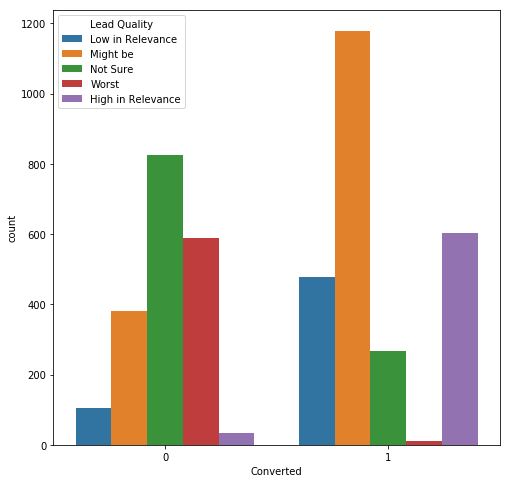

In [7]:
#observing the impact of Lead Quality variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='Lead Quality',data=df)

- as we can observe from the above plot distribution is not same for 0 and 1 (converted and not converted),eg- "worst" of not converted is more than worst of converted so this column is important but 51% of data is missing so imputing it will cause major bias in the data set so droping the column



In [8]:
df.drop('Lead Quality',axis=1,inplace=True)

In [9]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

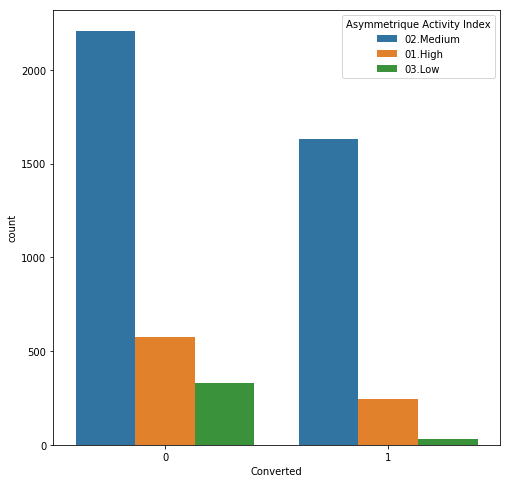

In [10]:
#observing the impact of Asymmetrique Activity Index variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='Asymmetrique Activity Index',data=df)

- Observing the above plot distribution of 0 and 1 are same eg- medium is higher than high and low for both 0 and 1,if the number of 1's and 0's were be same then count of high,low,medium would had been same for both 0 and 1 so this column is not impacting much to target variable and also it has high missing values 

In [11]:
df.drop('Asymmetrique Activity Index',axis=1,inplace=True)

In [12]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

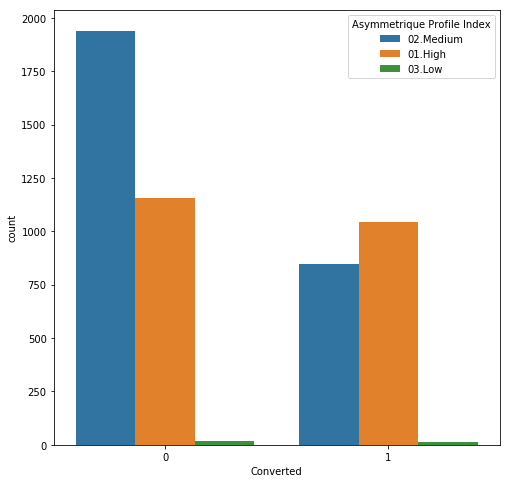

In [13]:
#observing the impact of Asymmetrique Profile Index variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='Asymmetrique Profile Index',data=df)

- "Asymmetrique Profile Index" column is bit more impacting the target variable since medium is less for 1 and more for 0 rest everything is constant and distribution is different so trying for imputing.

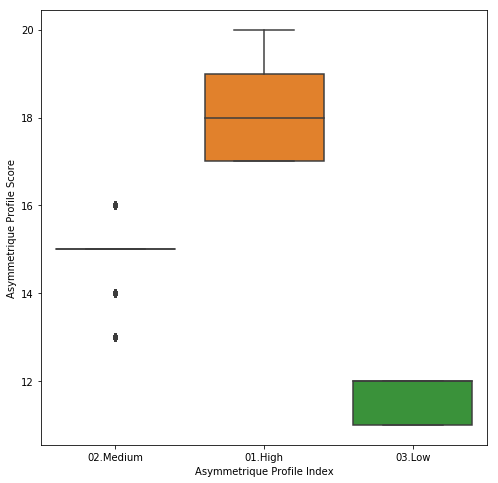

In [14]:
#observing the releation between Asymmetrique Profile Index variable and  Asymmetrique Activity Score
plt.figure(figsize=(8,8))
sns.boxplot(x='Asymmetrique Profile Index',y='Asymmetrique Profile Score',data=df)

- since there is clear releation between Asymmetrique Profile Index and Asymmetrique Profile Score so we can impute by comparing values of each other

In [15]:
#since Asymmetrique Activity Index null values are also null values for other columns so it is not possible to impute by comparing with other columns
df.loc[df['Asymmetrique Profile Index'].isnull(),['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']]

C:\Users\mahes\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
963,NaN,NaN,NaN,NaN
1363,NaN,NaN,NaN,NaN
1388,NaN,NaN,NaN,NaN
1401,NaN,NaN,NaN,NaN
1513,NaN,NaN,NaN,NaN
2320,NaN,NaN,NaN,NaN
2629,NaN,NaN,NaN,NaN
2631,NaN,NaN,NaN,NaN
2632,NaN,NaN,NaN,NaN
2633,NaN,NaN,NaN,NaN


- since Asymmetrique Profile Index null values are also null values for other columns so it is not possible to impute by comparing with other columns and also 45% values are missing so removing these columns


In [16]:
df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [17]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [18]:
#country and city does not contribute much to the bussiness since it is online course so deleting them
df.drop(['Country','City'],axis=1,inplace=True)

In [19]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

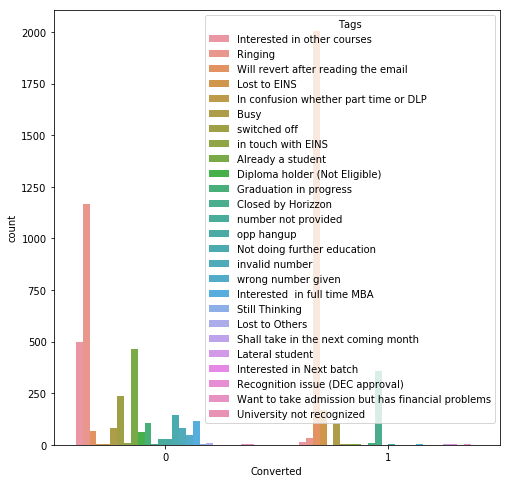

In [20]:
#observing the impact of Tags variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='Tags',data=df)

- the tag column looks important since distribution of 0 an 1 are different so we can ask for data from client but now since 30% of data is missing so deleting it

In [21]:
df.drop(['Tags'],axis=1,inplace=True)

In [22]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

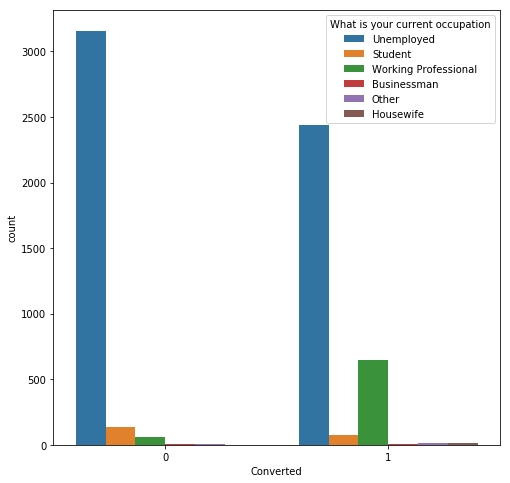

In [23]:
#observing the impact of Tags variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='What is your current occupation',data=df)

In [24]:
# "What is your current occupation" not impacting much and also it has 29% missing data so removing it
df.drop(['What is your current occupation'],axis=1,inplace=True)

In [25]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

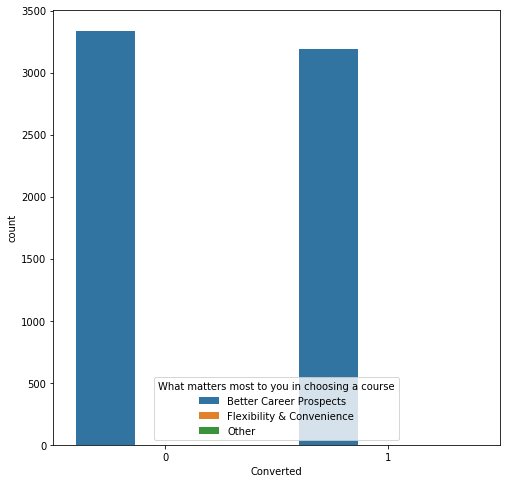

In [26]:
#observing the impact of Tags variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='What matters most to you in choosing a course',data=df)

In [27]:
# There is almost no variance in column "What matters most to you in choosing a course" so removing it
df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [28]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
How did you hear about X Education          23.885281
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

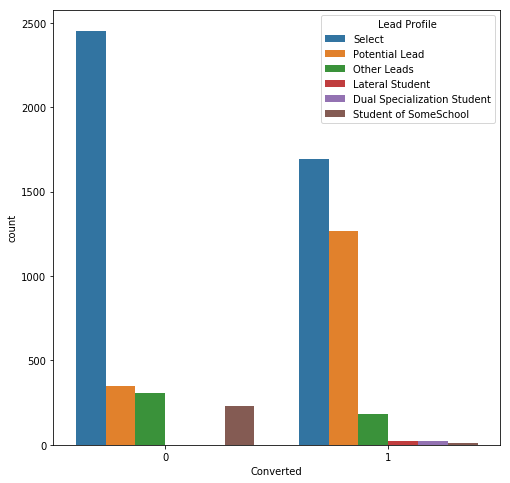

In [29]:
#observing the impact of Lead Profile variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='Lead Profile',data=df)

- Lead Profile has lot of missing values select is also missing value so droping it 

In [30]:
df.drop(['Lead Profile'],axis=1,inplace=True)

In [31]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
How did you hear about X Education          23.885281
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

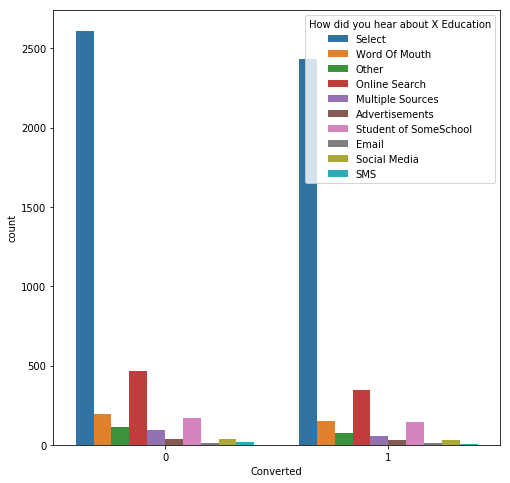

In [32]:
#observing the impact of Lead Profile variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='How did you hear about X Education',data=df)

In [33]:
#Lead Profile has lot of missing values select is also missing value so droping it and also it is not important by looking at distribution

df.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [34]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Update me on Supply Chain Co

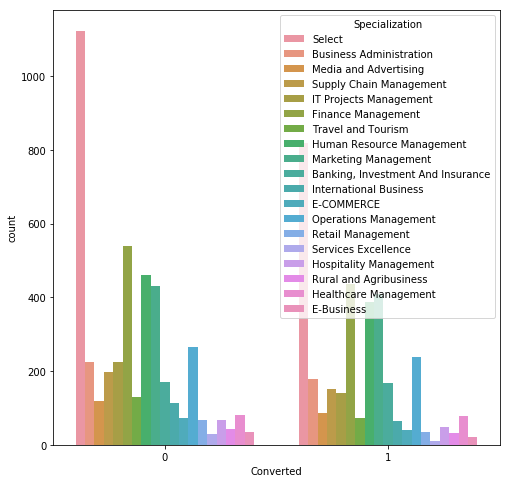

In [35]:
#observing the impact of Lead Profile variable on Target variable
plt.figure(figsize=(8,8))
sns.countplot(x='Converted',hue='Specialization',data=df)

In [36]:
#Specialization has lot of missing values select is also missing value so droping it and also it is not important by looking at distribution

df.drop(['Specialization'],axis=1,inplace=True)

In [37]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.000000
Update me on Supply Chain Content           0.000000
Get updates on DM Content                   0.

- since "TotalVisits,Page Views Per Visit,Last Activity,Lead Source" contain only 1% of missing value so deleting only missing values

In [38]:
df.dropna(subset=['TotalVisits','Page Views Per Visit','Last Activity','Lead Source'],inplace=True)

In [39]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview  

- All the missing values are treated

In [40]:
#Now checking all unique dimensions of categorical variables
cat_cols=df.select_dtypes(exclude='number').columns

temp=pd.DataFrame()
for cols in cat_cols:
    temp=pd.concat([temp,pd.DataFrame(df[cols].unique())],axis=1)
temp.columns=cat_cols
temp

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,Landing Page Submission,Organic Search,Yes,Yes,Email Opened,Yes,NaN,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Yes,Email Opened
2,Lead Add Form,Direct Traffic,NaN,NaN,Unreachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Page Visited on Website
3,Lead Import,Google,NaN,NaN,Converted to Lead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Email Bounced
4,NaN,Referral Sites,NaN,NaN,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Email Link Clicked
5,NaN,Reference,NaN,NaN,Email Bounced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unreachable
6,NaN,google,NaN,NaN,Email Link Clicked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsubscribed
7,NaN,Welingak Website,NaN,NaN,Form Submitted on Website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Had a Phone Conversation
8,NaN,Facebook,NaN,NaN,Unsubscribed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Olark Chat Conversation
9,NaN,blog,NaN,NaN,Had a Phone Conversation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMS Sent


- As we can see "Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque ,A free copy of Mastering The Interview" columns have only 1 dimension "No" so 0 variance therefore removing these columns

In [41]:
df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1,inplace=True)

In [42]:
#checking percentage of missing values
100*df.isnull().sum()/len(df.index)

Lead Origin                    0.0
Lead Source                    0.0
Do Not Email                   0.0
Do Not Call                    0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
Last Activity                  0.0
Search                         0.0
Newspaper Article              0.0
X Education Forums             0.0
Newspaper                      0.0
Digital Advertisement          0.0
Through Recommendations        0.0
Last Notable Activity          0.0
dtype: float64

In [43]:
df_copy=df.copy()

## Data Preperation

In [44]:
#creating dummy variables
cat_cols=df.select_dtypes(exclude='number').columns
temp=pd.get_dummies(data=df[cat_cols],drop_first=True)

df=pd.concat([df,temp],axis=1)

In [45]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
# removing categorical variables
df.drop(cat_cols,axis=1,inplace=True)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
#splitting train and test data
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [49]:
#Scaling the numerical variables
scaler=StandardScaler()
df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\mahes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mahes\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
df_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.385136,-3.668141e-16,2.774246e-16,-3.059538e-16,0.535979,0.068651,0.003779,0.278066,0.003936,0.320107,0.000315,0.000157,0.186427,0.127224,0.000157,0.000157,0.051645,0.013384,0.000315,0.0,0.015903,0.000472,0.000157,0.00063,0.000157,0.000157,0.000157,0.078885,0.000315,0.044717,0.034640,0.028185,0.000315,0.373799,0.000315,0.011809,0.002677,0.105338,0.070698,0.000157,0.308298,0.011022,0.006141,0.000945,0.000157,0.001575,0.000315,0.000157,0.000157,0.000472,0.000787,0.007243,0.018422,0.000315,0.305464,0.000157,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.486666,1.000079e+00,1.000079e+00,1.000079e+00,0.498743,0.252879,0.061362,0.448082,0.062622,0.466554,0.017744,0.012548,0.389482,0.333250,0.012548,0.012548,0.221328,0.114920,0.017744,0.0,0.125110,0.021731,0.012548,0.02509,0.012548,0.012548,0.012548,0.269581,0.017744,0.206699,0.182881,0.165513,0.017744,0.483849,0.017744,0.108035,0.051672,0.307012,0.256339,0.012548,0.461827,0.104413,0.078128,0.030724,0.012548,0.039653,0.017744,0.012548,0.012548,0.021731,0.028050,0.084803,0.134483,0.017744,0.460640,0.012548,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,-6.713838e-01,-8.886503e-01,-1.132538e+00,0.000000,0.000000,0.00

In [51]:
y_train=df_train.pop('Converted')
X_train=df_train

## Model Building

In [52]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [53]:
logit=LogisticRegression()
rfe=RFE(logit,20)
rfe=rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False False False False False  True
 False False False  True False  True False  True False False  True False
 False False  True False  True  True False False False False False  True
  True  True False False False False False False False False False  True
 False False False  True False  True False False False  True  True  True
 False False False False False]
[39  1 41 34  1  1 16 42 20 37 23  1 19 33 32  1 18  1 46  1 44 17  1 31
 24 25  1  7  1  1  2 15 43  8  3  1  1  1  9 21  5 11 36 40 45 29 28  1
 38 14 12  1 22  1 27 35  6  1  1  1 13 10  4 26 30]


In [54]:
pd.DataFrame([rfe.support_,rfe.ranking_])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,True,False,False,False,False,False
1,39,1,41,34,1,1,16,42,20,37,23,1,19,33,32,1,18,1,46,1,44,17,1,31,24,25,1,7,1,1,2,15,43,8,3,1,1,1,9,21,5,11,36,40,45,29,28,1,38,14,12,1,22,1,27,35,6,1,1,1,13,10,4,26,30


In [55]:
# variables selected by rfe
columns=list(X_train.columns[rfe.support_])
columns

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Olark Chat',
 'Lead Source_Reference',
 'Lead Source_Social Media',
 'Lead Source_Welingak Website',
 'Lead Source_google',
 'Do Not Email_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Page Visited on Website',
 'Newspaper_Yes',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website']

In [56]:
X_train_filtered=X_train[columns]

In [57]:
logit=sm.GLM(y_train,sm.add_constant(X_train_filtered),family=sm.families.Binomial())
logit.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.3
Date:                Sun, 25 Aug 2019   Deviance:                       5564.6
Time:                        22:03:34   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3593      0.067      5.367      0.000       0.228       0.491
Total Time Spent on Website                       1.1495      0.040     29.008      0.000       1.072       1.227
Lead Origin_Lead Add Form                         1.9674      0.921      2.137      0.033       0.163       3.772
Lead Origin_Lead Import                           1.5561      0.433      3.596      0.000       0.708       2.404
Lead Source_Olark Chat                            1.1654      0.101     11.510      0.000       0.967       1.364
Lead Source_Reference                             2.2750      0.945      2.408      0.016       0.424       4.126
Lead Source_Social Media                          2.1304      1.441      1.479      0.139      -0.694       4.954
Lead Source_Welingak Website                      3.8413      1.171      3.279      0.001       1.546       6.137
Lead Source_google                              -20.3005   1.26e+04     -0.002      0.999   -2.47e+04    2.47e+04
Do Not Email_Yes                                 -1.5639      0.192     -8.133      0.000      -1.941      -1.187
Last Activity_Converted to Lead                  -1.0872      0.220     -4.934      0.000      -1.519      -0.655
Last Activity_Email Bounced                      -1.3449      0.416     -3.230      0.001      -2.161      -0.529
Last Activity_Had a Phone Conversation            1.7665      0.771      2.290      0.022       0.254       3.279
Last Activity_Olark Chat Conversation            -1.4164      0.189     -7.480      0.000      -1.788      -1.045
Last Activity_Page Visited on Website            -0.4549      0.211     -2.152      0.031      -0.869      -0.041
Newspaper_Yes                                   -23.3266   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Last Notable Activity_Email Link Clicked         -1.8645      0.247     -7.560      0.000      -2.348      -1.381
Last Notable Activity_Email Opened               -1.3989      0.085    -16.435      0.000      -1.566      -1.232
Last Notable Activity_Modified                   -1.6988      0.102    -16.618      0.000      -1.899      -1.498
Last Notable Activity_Olark Chat Conversation    -1.5042      0.363     -4.144      0.000      -2.216      -0.793
Last Notable Activity_Page Visited on Website    -1.2394      0.287     -4.324      0.000      -1.801      -0.678
=================================================================================================================
"""

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif=pd.DataFrame()
vif['features']=X_train_filtered.columns
vif['vif']=[variance_inflation_factor(X_train_filtered.values,i) for i in range(0,len(X_train_filtered.columns))]
vif.sort_values(by='vif')

,features,vif
14,Newspaper_Yes,1.001511
11,Last Activity_Had a Phone Conversation,1.002565
5,Lead Source_Social Media,1.003467
7,Lead Source_google,1.005648
2,Lead Origin_Lead Import,1.013867
15,Last Notable Activity_Email Link Clicked,1.014818
16,Last Notable Activity_Email Opened,1.108382
0,Total Time Spent on Website,1.212380
9,Last Activity_Converted to Lead,1.279240
18,Last Notable Activity_Olark Chat Conversation,1.346854


### model2

In [60]:
X_train_filtered.drop('Lead Source_google',axis=1,inplace=True)

C:\Users\mahes\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
logit=sm.GLM(y_train,sm.add_constant(X_train_filtered),family=sm.families.Binomial())
logit.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2783.5
Date:                Sun, 25 Aug 2019   Deviance:                       5566.9
Time:                        22:03:35   Pearson chi2:                 6.50e+03
No. Iterations:                    19   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3592      0.067      5.365      0.000       0.228       0.490
Total Time Spent on Website                       1.1491      0.040     29.003      0.000       1.071       1.227
Lead Origin_Lead Add Form                         1.9681      0.921      2.137      0.033       0.163       3.773
Lead Origin_Lead Import                           1.5566      0.433      3.597      0.000       0.708       2.405
Lead Source_Olark Chat                            1.1657      0.101     11.513      0.000       0.967       1.364
Lead Source_Reference                             2.2753      0.945      2.409      0.016       0.424       4.127
Lead Source_Social Media                          2.1381      1.442      1.483      0.138      -0.687       4.964
Lead Source_Welingak Website                      3.8415      1.171      3.279      0.001       1.546       6.137
Do Not Email_Yes                                 -1.5634      0.192     -8.132      0.000      -1.940      -1.187
Last Activity_Converted to Lead                  -1.0836      0.220     -4.919      0.000      -1.515      -0.652
Last Activity_Email Bounced                      -1.3437      0.416     -3.227      0.001      -2.160      -0.528
Last Activity_Had a Phone Conversation            1.7679      0.772      2.291      0.022       0.256       3.280
Last Activity_Olark Chat Conversation            -1.4135      0.189     -7.465      0.000      -1.785      -1.042
Last Activity_Page Visited on Website            -0.4667      0.211     -2.212      0.027      -0.880      -0.053
Newspaper_Yes                                   -22.3256   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Last Notable Activity_Email Link Clicked         -1.8645      0.247     -7.561      0.000      -2.348      -1.381
Last Notable Activity_Email Opened               -1.3988      0.085    -16.435      0.000      -1.566      -1.232
Last Notable Activity_Modified                   -1.7020      0.102    -16.654      0.000      -1.902      -1.502
Last Notable Activity_Olark Chat Conversation    -1.5071      0.363     -4.153      0.000      -2.218      -0.796
Last Notable Activity_Page Visited on Website    -1.2275      0.286     -4.287      0.000      -1.789      -0.666
=================================================================================================================
"""

In [62]:
vif=pd.DataFrame()
vif['features']=X_train_filtered.columns
vif['vif']=[variance_inflation_factor(X_train_filtered.values,i) for i in range(0,len(X_train_filtered.columns))]
vif.sort_values(by='vif')

,features,vif
13,Newspaper_Yes,1.001511
10,Last Activity_Had a Phone Conversation,1.002563
5,Lead Source_Social Media,1.003457
2,Lead Origin_Lead Import,1.013866
14,Last Notable Activity_Email Link Clicked,1.014817
15,Last Notable Activity_Email Opened,1.108378
0,Total Time Spent on Website,1.212368
8,Last Activity_Converted to Lead,1.278997
17,Last Notable Activity_Olark Chat Conversation,1.346761
3,Lead Source_Olark Chat,1.655708


### model3

In [63]:
X_train_filtered.drop('Newspaper_Yes',axis=1,inplace=True)

C:\Users\mahes\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
logit=sm.GLM(y_train,sm.add_constant(X_train_filtered),family=sm.families.Binomial())
logit.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.4
Date:                Sun, 25 Aug 2019   Deviance:                       5570.8
Time:                        22:03:35   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3595      0.067      5.372      0.000       0.228       0.491
Total Time Spent on Website                       1.1464      0.040     28.973      0.000       1.069       1.224
Lead Origin_Lead Add Form                         1.9669      0.921      2.136      0.033       0.162       3.771
Lead Origin_Lead Import                           1.5552      0.433      3.594      0.000       0.707       2.403
Lead Source_Olark Chat                            1.1638      0.101     11.496      0.000       0.965       1.362
Lead Source_Reference                             2.2743      0.945      2.408      0.016       0.423       4.126
Lead Source_Social Media                          2.1373      1.441      1.483      0.138      -0.688       4.962
Lead Source_Welingak Website                      3.8401      1.171      3.279      0.001       1.544       6.136
Do Not Email_Yes                                 -1.5627      0.192     -8.132      0.000      -1.939      -1.186
Last Activity_Converted to Lead                  -1.0828      0.220     -4.918      0.000      -1.514      -0.651
Last Activity_Email Bounced                      -1.3435      0.416     -3.228      0.001      -2.159      -0.528
Last Activity_Had a Phone Conversation            1.7671      0.771      2.291      0.022       0.255       3.279
Last Activity_Olark Chat Conversation            -1.4140      0.189     -7.470      0.000      -1.785      -1.043
Last Activity_Page Visited on Website            -0.4660      0.211     -2.210      0.027      -0.879      -0.053
Last Notable Activity_Email Link Clicked         -1.8641      0.247     -7.561      0.000      -2.347      -1.381
Last Notable Activity_Email Opened               -1.4009      0.085    -16.465      0.000      -1.568      -1.234
Last Notable Activity_Modified                   -1.7013      0.102    -16.655      0.000      -1.901      -1.501
Last Notable Activity_Olark Chat Conversation    -1.5053      0.363     -4.150      0.000      -2.216      -0.794
Last Notable Activity_Page Visited on Website    -1.2272      0.286     -4.288      0.000      -1.788      -0.666
=================================================================================================================
"""

In [65]:
vif=pd.DataFrame()
vif['features']=X_train_filtered.columns
vif['vif']=[variance_inflation_factor(X_train_filtered.values,i) for i in range(0,len(X_train_filtered.columns))]
vif.sort_values(by='vif')

,features,vif
10,Last Activity_Had a Phone Conversation,1.002562
5,Lead Source_Social Media,1.003457
2,Lead Origin_Lead Import,1.013866
13,Last Notable Activity_Email Link Clicked,1.014817
14,Last Notable Activity_Email Opened,1.107942
0,Total Time Spent on Website,1.211221
8,Last Activity_Converted to Lead,1.278997
16,Last Notable Activity_Olark Chat Conversation,1.346759
3,Lead Source_Olark Chat,1.655675
7,Do Not Email_Yes,1.797250


### model 4

In [66]:
X_train_filtered.drop('Lead Source_Social Media',axis=1,inplace=True)

C:\Users\mahes\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
logit=sm.GLM(y_train,sm.add_constant(X_train_filtered),family=sm.families.Binomial())
model4=logit.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.3
Date:                Sun, 25 Aug 2019   Deviance:                       5572.7
Time:                        22:03:36   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3601      0.067      5.381      0.000       0.229       0.491
Total Time Spent on Website                       1.1460      0.040     28.967      0.000       1.068       1.224
Lead Origin_Lead Add Form                         1.9663      0.921      2.136      0.033       0.162       3.771
Lead Origin_Lead Import                           1.5542      0.433      3.591      0.000       0.706       2.402
Lead Source_Olark Chat                            1.1610      0.101     11.473      0.000       0.963       1.359
Lead Source_Reference                             2.2737      0.945      2.407      0.016       0.422       4.125
Lead Source_Welingak Website                      3.8398      1.171      3.278      0.001       1.544       6.135
Do Not Email_Yes                                 -1.5638      0.192     -8.140      0.000      -1.940      -1.187
Last Activity_Converted to Lead                  -1.0832      0.220     -4.920      0.000      -1.515      -0.652
Last Activity_Email Bounced                      -1.3425      0.416     -3.225      0.001      -2.158      -0.527
Last Activity_Had a Phone Conversation            1.7665      0.771      2.290      0.022       0.255       3.278
Last Activity_Olark Chat Conversation            -1.4007      0.189     -7.426      0.000      -1.770      -1.031
Last Activity_Page Visited on Website            -0.4535      0.211     -2.154      0.031      -0.866      -0.041
Last Notable Activity_Email Link Clicked         -1.8637      0.247     -7.560      0.000      -2.347      -1.381
Last Notable Activity_Email Opened               -1.4009      0.085    -16.466      0.000      -1.568      -1.234
Last Notable Activity_Modified                   -1.7012      0.102    -16.655      0.000      -1.901      -1.501
Last Notable Activity_Olark Chat Conversation    -1.5172      0.362     -4.187      0.000      -2.227      -0.807
Last Notable Activity_Page Visited on Website    -1.2397      0.286     -4.336      0.000      -1.800      -0.679
=================================================================================================================
"""

In [68]:
vif=pd.DataFrame()
vif['features']=X_train_filtered.columns
vif['vif']=[variance_inflation_factor(X_train_filtered.values,i) for i in range(0,len(X_train_filtered.columns))]
vif.sort_values(by='vif')

,features,vif
9,Last Activity_Had a Phone Conversation,1.002562
2,Lead Origin_Lead Import,1.013866
12,Last Notable Activity_Email Link Clicked,1.014813
13,Last Notable Activity_Email Opened,1.107923
0,Total Time Spent on Website,1.211219
7,Last Activity_Converted to Lead,1.278993
15,Last Notable Activity_Olark Chat Conversation,1.346594
3,Lead Source_Olark Chat,1.655276
6,Do Not Email_Yes,1.797123
8,Last Activity_Email Bounced,1.810274


### model5

In [69]:
X_train_filtered.drop('Lead Origin_Lead Add Form',axis=1,inplace=True)
logit=sm.GLM(y_train,sm.add_constant(X_train_filtered),family=sm.families.Binomial())
model=logit.fit()
model.summary()

C:\Users\mahes\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2788.9
Date:                Sun, 25 Aug 2019   Deviance:                       5577.7
Time:                        22:03:36   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3642      0.067      5.446      0.000       0.233       0.495
Total Time Spent on Website                       1.1437      0.040     28.954      0.000       1.066       1.221
Lead Origin_Lead Import                           1.5489      0.433      3.579      0.000       0.701       2.397
Lead Source_Olark Chat                            1.1595      0.101     11.475      0.000       0.961       1.358
Lead Source_Reference                             4.2348      0.223     18.964      0.000       3.797       4.673
Lead Source_Welingak Website                      5.8013      0.728      7.973      0.000       4.375       7.227
Do Not Email_Yes                                 -1.5673      0.192     -8.163      0.000      -1.944      -1.191
Last Activity_Converted to Lead                  -1.0848      0.220     -4.929      0.000      -1.516      -0.653
Last Activity_Email Bounced                      -1.3416      0.416     -3.224      0.001      -2.157      -0.526
Last Activity_Had a Phone Conversation            1.7628      0.771      2.285      0.022       0.251       3.275
Last Activity_Olark Chat Conversation            -1.4036      0.189     -7.443      0.000      -1.773      -1.034
Last Activity_Page Visited on Website            -0.4500      0.210     -2.143      0.032      -0.861      -0.038
Last Notable Activity_Email Link Clicked         -1.8671      0.246     -7.576      0.000      -2.350      -1.384
Last Notable Activity_Email Opened               -1.4018      0.085    -16.481      0.000      -1.568      -1.235
Last Notable Activity_Modified                   -1.7021      0.102    -16.666      0.000      -1.902      -1.502
Last Notable Activity_Olark Chat Conversation    -1.5171      0.362     -4.188      0.000      -2.227      -0.807
Last Notable Activity_Page Visited on Website    -1.2319      0.285     -4.324      0.000      -1.790      -0.673
=================================================================================================================
"""

In [70]:
vif=pd.DataFrame()
vif['features']=X_train_filtered.columns
vif['vif']=[variance_inflation_factor(X_train_filtered.values,i) for i in range(0,len(X_train_filtered.columns))]
vif.sort_values(by='vif')

,features,vif
8,Last Activity_Had a Phone Conversation,1.002562
1,Lead Origin_Lead Import,1.013863
11,Last Notable Activity_Email Link Clicked,1.014809
4,Lead Source_Welingak Website,1.023869
3,Lead Source_Reference,1.078537
12,Last Notable Activity_Email Opened,1.107739
0,Total Time Spent on Website,1.211197
6,Last Activity_Converted to Lead,1.278966
14,Last Notable Activity_Olark Chat Conversation,1.346579
2,Lead Source_Olark Chat,1.654813


## Model Evaluation

In [71]:
y_train_pred=pd.DataFrame(y_train)
y_train_pred['proba']=model.predict(sm.add_constant(X_train_filtered))
y_train_pred

,Converted,proba
3009,0,0.227789
1012,0,0.040607
9226,0,0.232412
4750,1,0.904104
7987,1,0.725044
1281,1,0.804193
2880,0,0.114506
4971,1,0.927011
7536,1,0.890587
1248,0,0.687200


In [72]:
from sklearn import metrics

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

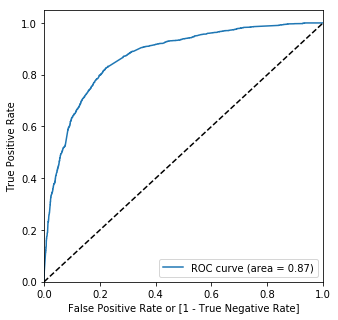

In [74]:
draw_roc(y_train_pred.Converted, y_train_pred.proba)

- we have ROC=0.87 which is preety good, so let us check sensitivity and specificity trade off to find optimal cutoff

In [75]:
y_train_pred_copy=y_train_pred.copy()

In [76]:
# creating columns with different probability cutoffs 
numbers=[float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred[i]=y_train_pred['proba'].map(lambda x: 1 if x>i else 0)
y_train_pred.head()

,Converted,proba,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.227789,1,1,1,0,0,0,0,0,0,0
1012,0,0.040607,1,0,0,0,0,0,0,0,0,0
9226,0,0.232412,1,1,1,0,0,0,0,0,0,0
4750,1,0.904104,1,1,1,1,1,1,1,1,1,1
7987,1,0.725044,1,1,1,1,1,1,1,1,0,0


In [77]:
df_cutoff=pd.DataFrame(columns=['Prob','accurracy','sensitivity','specificity'])
for i in numbers:
    conf_matrix=metrics.confusion_matrix(y_train,y_train_pred[i])
    accuracy=metrics.accuracy_score(y_train,y_train_pred[i])
    sensitivity=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    specificity=conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    df_cutoff.loc[i]=[i,accuracy,sensitivity,specificity]
df_cutoff   

,Prob,accurracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.578019,0.972200,0.331114
0.2,0.2,0.723193,0.915781,0.602561
0.3,0.3,0.794206,0.829518,0.772087
0.4,0.4,0.800976,0.764922,0.823560
0.5,0.5,0.798614,0.676615,0.875032
0.6,0.6,0.790112,0.599755,0.909347
0.7,0.7,0.760195,0.463614,0.945967
0.8,0.8,0.737679,0.373671,0.965685
0.9,0.9,0.681467,0.192968,0.987452


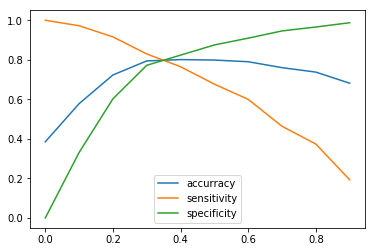

In [78]:
df_cutoff[['accurracy','sensitivity','specificity']].plot.line()

- From the plot above we can see cutoff probablity is 0.35 so chossing the same

In [79]:
#getting our original dataframe back
y_train_pred=y_train_pred_copy.copy()
y_train_pred.head()

,Converted,proba
3009,0,0.227789
1012,0,0.040607
9226,0,0.232412
4750,1,0.904104
7987,1,0.725044


In [80]:
y_train_pred['Predicted']=y_train_pred['proba'].map(lambda x: 1 if x>0.35 else 0)
y_train_pred.head()

,Converted,proba,Predicted
3009,0,0.227789,0
1012,0,0.040607,0
9226,0,0.232412,0
4750,1,0.904104,1
7987,1,0.725044,1


In [81]:
conf_matrix=metrics.confusion_matrix(y_train,y_train_pred['Predicted'])
accuracy=metrics.accuracy_score(y_train,y_train_pred['Predicted'])
sensitivity=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
specificity=conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])

print(accuracy)
print(sensitivity)
print(specificity)

0.7978271138403401
0.8094848732624693
0.7905249679897567


In [82]:
from sklearn.metrics import precision_recall_curve

In [83]:
p, r, thresholds = precision_recall_curve(y_train_pred.Converted, y_train_pred.proba)

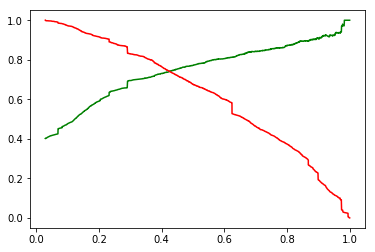

In [84]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [85]:
y_train_pred['Predicted']=y_train_pred['proba'].map(lambda x: 1 if x>0.42 else 0)
y_train_pred.head()

,Converted,proba,Predicted
3009,0,0.227789,0
1012,0,0.040607,0
9226,0,0.232412,0
4750,1,0.904104,1
7987,1,0.725044,1


In [86]:
metrics.precision_score(y_train,y_train_pred['Predicted'])

0.7375657096643753

In [87]:
metrics.recall_score(y_train,y_train_pred['Predicted'])

0.7457072771872445

- Since Bussiness requirement is finding Sensitivity because CEO has said to get around 80% lead conversion which is nothing but Sensitivity so choosing cutoff which we got by sensitivity,specificity,accuracy plot

In [88]:
#Choosing the cutoff 0.35 i which sensitivity,specificity and accuracy are all 80%
y_train_pred['Predicted']=y_train_pred['proba'].map(lambda x: 1 if x>0.35 else 0)
y_train_pred.head()

,Converted,proba,Predicted
3009,0,0.227789,0
1012,0,0.040607,0
9226,0,0.232412,0
4750,1,0.904104,1
7987,1,0.725044,1


## Making prediction on Test data set

In [89]:
#Scaling the numerical variables
df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\mahes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mahes\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [90]:
#Variables are scaled
df_test.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.00000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.0,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.0,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0
mean,0.363202,-0.010022,-0.008906,-0.011040,0.543885,0.053250,0.002203,0.285347,0.002203,0.306647,0.0,0.0,0.208961,0.127066,0.0,0.000367,0.042233,0.01469,0.0,0.000367,0.010283,0.001102,0.0,0.000367,0.0,0.0,0.0,0.078957,0.0,0.052883,0.033786,0.032317,0.0,0.388542,0.0,0.015057,0.002938,0.111274,0.070143,0.0,0.278369,0.007345,0.007345,0.0,0.0,0.001469,0.0,0.0,0.0,0.000367,0.000734,0.005141,0.020566,0.0,0.324275,0.0,0.0,0.000734,0.361366,0.022769,0.036357,0.0,0.220345,0.002203,0.006243,0.0
std,0.481011,0.780925,1.001335,1.095258,0.498162,0.224573,0.046898,0.451663,0.046898,0.461186,0.0,0.0,0.406641,0.333108,0.0,0.019164,0.201157,0.12033,0.0,0.019164,0.100900,0.033180,0.0,0.019164,0.0,0.0,0.0,0.269721,0.0,0.223841,0.180712,0.176874,0.0,0.487508,0.0,0.121802,0.054133,0.314529,0.255435,0.0,0.448279,0.085402,0.085402,0.0,0.0,0.038306,0.0,0.0,0.0,0.019164,0.027096,0.071532,0.141951,0.0,0.468189,0.0,0.0,0.027096,0.480485,0.149194,0.187211,0.0,0.414556,0.046898,0.078781,0.0
min,0.000000,-0.671384,-0.888650,-1.132538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0

In [91]:
#preparing dataframe for prediction
y_test=df_test.pop('Converted')
X_test=df_test

In [92]:
#selecting columns which we got from final model
X_test_filtered=X_test[columns]
X_test_filtered.drop(['Lead Source_google','Newspaper_Yes','Lead Source_Social Media','Lead Origin_Lead Add Form'],axis=1,inplace=True)

C:\Users\mahes\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [93]:
#displaying columns selected
list(X_test_filtered.columns)

['Total Time Spent on Website',
 'Lead Origin_Lead Import',
 'Lead Source_Olark Chat',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Page Visited on Website',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website']

In [94]:
y_test_pred=pd.DataFrame(y_test)
y_test_pred['proba']=model.predict(sm.add_constant(X_test_filtered))
y_test_pred.head()

,Converted,proba
3271,0,0.151298
1490,1,0.754172
7936,0,0.130264
4216,1,0.867678
3830,0,0.153194


In [95]:
y_test_pred['Predicted']=y_test_pred['proba'].map(lambda x: 1 if x>0.35 else 0)
y_test_pred.head()

,Converted,proba,Predicted
3271,0,0.151298,0
1490,1,0.754172,1
7936,0,0.130264,0
4216,1,0.867678,1
3830,0,0.153194,0


In [96]:
conf_matrix=metrics.confusion_matrix(y_test,y_test_pred['Predicted'])
accuracy=metrics.accuracy_score(y_test,y_test_pred['Predicted'])
sensitivity=conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
specificity=conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])

print(accuracy)
print(sensitivity)
print(specificity)

0.786265148733015
0.782608695652174
0.7883506343713956
